# this notebook is for Week5-Assignment-all figures
# author: Rui Zeng, N15471955, rz2522@nyu.edu
# assignment:Make a plot of phi vs time and psi vs time.
# Make a free energy surface in phi, psi space from this data. In otherwords, compute a 2d histogram of the phi, psi data and plot the -log(histogram), nicely labeled, with a colorbar, etc
# Make a free energy surface for T=300 using the data in T=300. Do you now see the whole surface? Set the maximum free energy to 10 kT
# Plot how each replica is moving in temperature in replica_temp (you may have to do every 100 frame to see what's happening) and make sure it goes up and down
# Using 'gmx_mpi energy', calculate the potential energy in each replica. Compute a histogram of energy in each case, and plot all the histograms on the same plot. Do they overlap well?

In [1]:
# import libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [635]:
# load the trajectory from ../Data
trr_file = '../Data/adp.trr'
gro_file = '../Data/adp.gro'
traj = md.load(trr_file, top=gro_file)
# check the trajectory
print(traj)
# shape of trajtime
print(traj.time.shape)

<mdtraj.Trajectory with 5001 frames, 22 atoms, 3 residues, and unitcells>
(5001,)


In [636]:
# compute phi and psi angles
phi = md.compute_phi(traj, periodic=True)
psi = md.compute_psi(traj, periodic=True)
# check the returned values
print("phi[0]\n",phi[0])
print("phi[0],shape\n",phi[0].shape)
print("phi[1].shape\n",phi[1].shape)
# only get first coloumn of phi[1]
print("phi[1][:,0].shape\n",psi[1][:,0].shape)
print("phi[1].flatten().shape\n",phi[1].flatten().shape)

phi[0]
 [[ 4  6  8 14]]
phi[0],shape
 (1, 4)
phi[1].shape
 (5001, 1)
phi[1][:,0].shape
 (5001,)
phi[1].flatten().shape
 (5001,)


# mdtraj.compute_phi/psi returns: 1. indices of atoms (phi[0]); 2. dihedral angles in each frame (phi[1])
# 1. For phi[0], the shape is (n_phi, 4), because for each dihedral angle, 4 atoms (i.e. 2 planes) are needed to determine it.
# phi[0] would return like
[index1-1 index2-1 index3-1 index4-1] # this combination determins first angle
[index1-2 index2-2 index3-2 index4-2] # second angle
...
# In this case, there's only one dihedral angle value which is determined by atom 4/6/8/14

# 2. For phi[1], the shape is (n_frames, n_phi), like
[angle1 angle2 angle3 ... angleN] # in first frame
[angle1' angle2' angle3' ... angleN'] # in second frame
...
# In this case, there are 5001 frames, and each contains one angle.

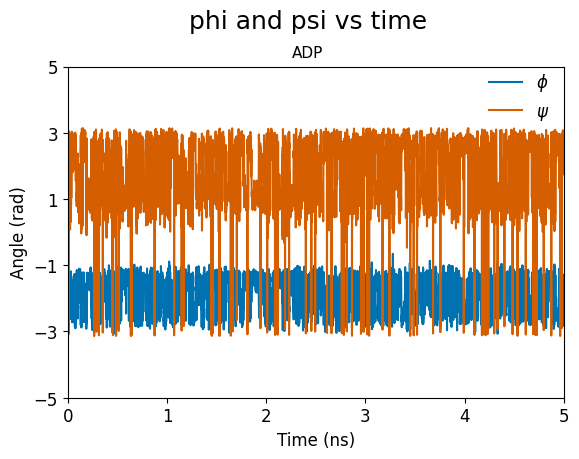

In [337]:
# figure 1: phi & psi over time
fig=plt.figure(1)
# plot phi, time in ns, colorblind-friendly
plt.plot(traj.time/1000, phi[1][:,0], color='#0072B2')
# plot psi, time in ns, colorblind-friendly
plt.plot(traj.time/1000, psi[1][:,0], color='#D55E00')
# set the axis labels, fontsize = 12
plt.xlabel('Time (ns)', fontsize=12)
plt.ylabel('Angle (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="phi and psi vs time", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# set the legend, fontsize = 12, location = upper right, frameon = False, shift the legend box up
plt.legend(['$\phi$', '$\psi$'], fontsize=12, loc='upper right', frameon=False, bbox_to_anchor=(1.0, 1.03))
# set limits for the axes
plt.xlim(0,5)
plt.ylim(-5,5)
plt.yticks(np.arange(-5,5.1,2))
# save figure as pdf in ../Figures
fname = '../Figures/fig.1-[adp]phi_psi_vs_time.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


stable state 1 : [-2.57610598] [2.82743339]
free energy: 0.15
stable state 2 : [-1.44513262] [1.19380521]
free energy: 0.00


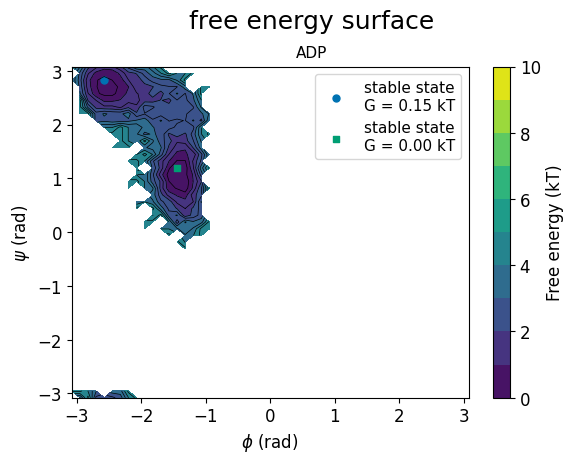

In [637]:
# figure 2: free energy surface-original data
fig=plt.figure(2)

# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10    

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+1): # if the free energy is less than 1, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11)
    i+=1

# save figure as pdf in ../Figures
fname = '../Figures/fig.2-[adp]free_energy_surface.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.45044227] [2.70176968]
free energy: 0.12
stable state 2 : [-1.44513262] [1.0681415]
free energy: 0.00


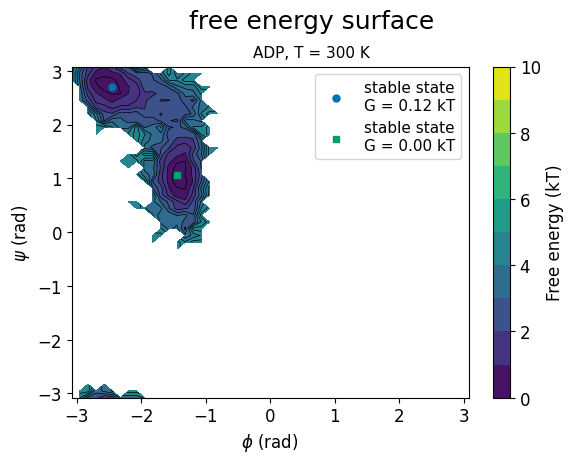

In [640]:
# preparation for figure 3: free energy surface-T300K
# load trajectory data
trr_file = '../Data/attempt_1_300_450_dT50/T300/adp_exchange4temps.trr'
gro_file = '../Data/attempt_1_300_450_dT50/T300/adp_exchange4temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, T = 300 K", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+1): # if the free energy is less than 1, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11)
    i+=1

# save figure as pdf in ../Figures
#fname = '../Figures/fig.3-[300K]free_energy_surface.pdf'
#plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.57610598] [2.82743339]
free energy: 0.08
stable state 2 : [-1.44513262] [1.0681415]
free energy: 0.00


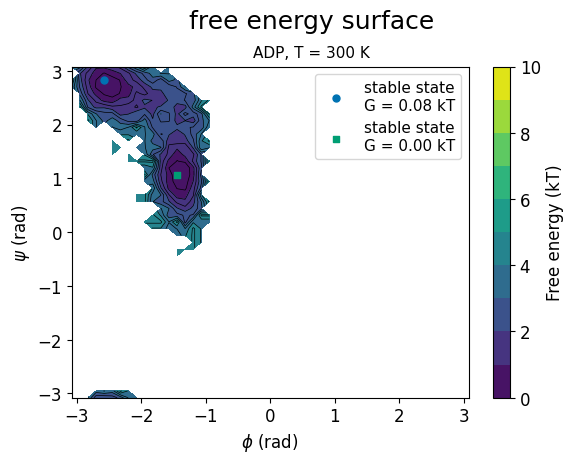

In [642]:
# preparation for figure 3: free energy surface-T300K
# load trajectory
trr_file = '../Data/attempt_2_300_450_dT50_repeat/T300/adp_exchange4temps.trr'
gro_file = '../Data/attempt_2_300_450_dT50_repeat/T300/adp_exchange4temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, T = 300 K", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+1): # if the free energy is less than 1, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11)
    i+=1

# save figure as pdf in ../Figures
#fname = '../Figures/fig.3-[300K]free_energy_surface.pdf'
#plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


stable state 1 : [-2.45044227] [2.57610598]
free energy: 0.00
stable state 2 : [-1.31946891] [1.0681415]
free energy: 0.26


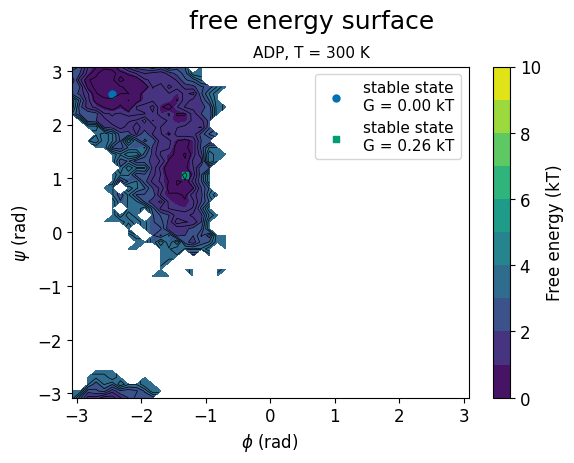

In [647]:
# preparation for figure 3: free energy surface-T300K
# load trajectory
trr_file = '../Data/attempt_3_300_540_dT80/T540/adp_exchange4temps.trr'
gro_file = '../Data/attempt_3_300_540_dT80/T540/adp_exchange4temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]])
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="free energy surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, T = 300 K", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+1): # if the free energy is less than 1, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11)
    i+=1

# save figure as pdf in ../Figures
#fname = '../Figures/fig.3-[300K]free_energy_surface.pdf'
#plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



In [606]:
Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
print(Fval)

0.10


stable state 1 : [-2.4818582] [2.6075219]
free energy: [0.09531018]
stable state 2 : [-1.41371669] [1.09955743]
free energy: [0.]


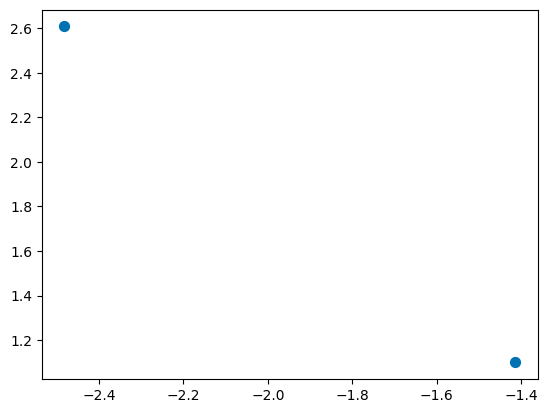

In [556]:
# stable states finding
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+1): # if the free energy is less than 1, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        print("free energy:", F[xidx[0][px1], yidx[0][px2]])
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color='#0072B2', s=50)
    i+=1


In [530]:
# define the area of interest
xidx = np.where((x > -1) & (x < np.pi))
yidx = np.where((y > -np.pi) & (y < np.pi))
# find the minimum in the area of interest
idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
# convert the indices to x and y indices
px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
# print the three lowest values in free energy
print(F[xidx[0], :][:, yidx[0]][px1, px2])





[3.49650756]


In [ ]:
xidx = np.where((x > -np.pi) & (x < -2))
yidx = np.where((y > -np.pi) & (y < np.pi))
# find the minimum in the area of interest
idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
# convert the indices to x and y indices
px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
# plot the minimum in the area of interest
plt.plot(x[xidx[0][px1]], y[yidx[0][px2]], 'ro', markersize=5)
# print the minimum in the area of interest
print(F[xidx[0], :][:, yidx[0]][px1, px2])

# define the area of interest
xidx = np.where((x > -1) & (x < np.pi))
yidx = np.where((y > -np.pi) & (y < np.pi))
# find the minimum in the area of interest
idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
# convert the indices to x and y indices
px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
# print the three lowest values in free energy
print(F[xidx[0], :][:, yidx[0]][px1, px2])
# plot the three lowest values in free energy
plt.plot(x[xidx[0][px1]], y[yidx[0][px2]], 'ro', markersize=5)
# print the three lowest values in free energy
print(F[xidx[0], :][:, yidx[0]][px1, px2])

c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


[ 0.   2.5  5.   7.5 10. ]


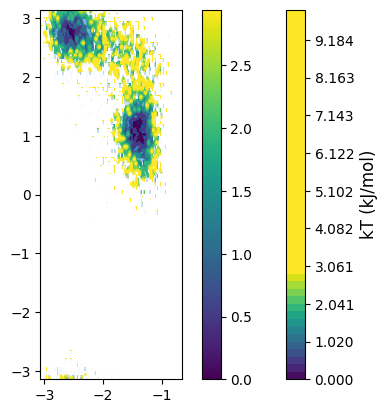

In [291]:
fig, ax = plt.subplots()
# plot with np.histogram2d, colorblind-friendly
#hist, xedges, yedges = np.histogram2d(phi[1].flatten(), psi[1].flatten(), bins=90)
from matplotlib.colors import LogNorm
counts,xbins,ybins,image = plt.hist2d(phi[1].flatten(), psi[1].flatten(), bins=90, norm=LogNorm(), cmap='Blues')
print(counts,xbins,ybins)
energy=-np.log(counts.T)
energy=energy-np.min(energy)
sub1=plt.imshow(energy, interpolation='nearest', origin='lower', extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()])
cbar = plt.colorbar(boundaries=np.linspace(0,10,))
plt.colorbar()
# combine contour lines to histogram
sub2=plt.contour(energy,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2, alpha=1,extend='both')
# combine two colorbars
v = np.linspace(0, 10, 5, endpoint=True)
print(v)

#fill the white space in the

cbar.set_label('kT (kJ/mol)', fontsize=12)
#plt.clim(0, 10)
#cbar.set_ticks(np.arange(0, 10.1, 2),extend='max')



#plt.contour(counts.T,extent=[-3.14, 3.14, -3.14, 3.14],linewidths=3)
#print([xbins.min(),xbins.max(),ybins.min(),ybins.max()])
#counts, discard1, discard2, discard3=plt.hist2d(phi[1].flatten(), psi[1].flatten(), bins=90, norm=LogNorm(), alpha=0)
#print(counts.max())
#ax.contour(counts.transpose(), extent=[-180, 180, -180, 180], levels=[96], linewidths=1, colors=["#DFF8FB" ], zorder=2, alpha=1)
#counts, discard1, discard2, discard3=plt.hist2d(phi[1].flatten(), psi[1].flatten(), bins=90, norm=LogNorm(), alpha=0)
#print(counts.max())
#ax.contour(counts.transpose(), extent=[-180, 180, -180, 180], levels=[15], linewidths=1, colors=["#045E93" ], zorder=2, alpha=0.3)
#plt.hist2d(phi[1].flatten(), psi[1].flatten(), bins=140, norm=LogNorm(), cmap="Blues", alpha=1)

c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


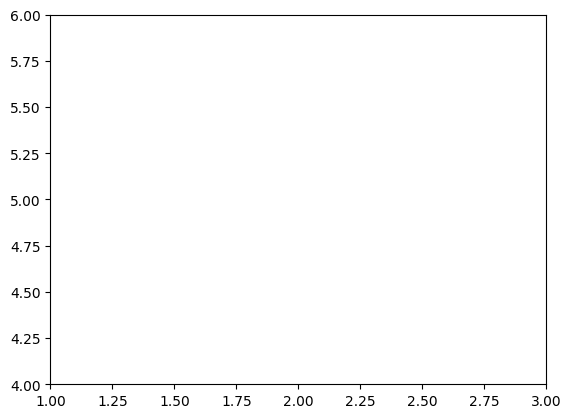

In [189]:
# import logNorm
from matplotlib.colors import LogNorm

#counts, discard1, discard2, discard3=plt.hist2d(a,b, bins=90, norm=LogNorm(), alpha=0)
counts, discard1, discard2, discard3=plt.hist2d(a,b, bins=90, alpha=0)
ax.contour(counts.transpose(), extent=[-180, 180, -180, 180], levels=[96], linewidths=1, colors=["#DFF8FB" ], zorder=2, alpha=1)
counts, discard1, discard2, discard3=plt.hist2d(a,b, bins=90, norm=LogNorm(), alpha=0)
ax.contour(counts.transpose(), extent=[-180, 180, -180, 180], levels=[15], linewidths=1, colors=["#045E93" ], zorder=2, alpha=0.3)

[[  76.   14.]
 [2082. 2829.]] 
 [[-4.33073334 -2.63905733]
 [-7.64108425 -7.94767857]]


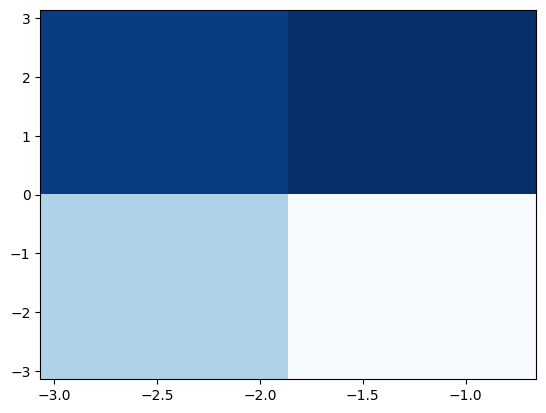

In [299]:
counts,xbins,ybins,image = plt.hist2d(phi[1].flatten(), psi[1].flatten(), bins=2, norm=LogNorm(), cmap='Blues')
energy=-np.log(counts.T)
print(counts.T,'\n', energy)

c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


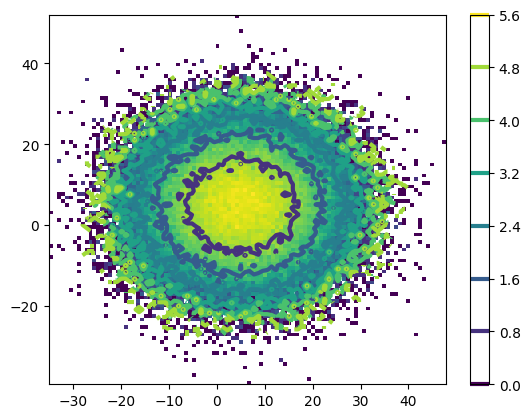

In [234]:
from matplotlib.colors import LogNorm
from matplotlib.pyplot import *

x = np.random.normal(5,10,100000)
y = np.random.normal(5,10,100000)
counts,ybins,xbins,image = hist2d(x,y,bins=100,norm=LogNorm())
energy=-np.log(counts)
energy = energy - energy.min()
contour(energy,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)
# add colorbar
cbar = plt.colorbar()